# Import libaries

In [ ]:
import tensorflow as tf
import tensorflow.python.platform.build_info as build

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle as p
to_categorical = tf.keras.utils.to_categorical
mnist = tf.keras.datasets.fashion_mnist
load_model = tf.keras.models.load_model
model_from_json = tf.keras.models.model_from_json

# DATA PREPARATION

In [ ]:
batch_size = 128
num_classes = 10
epochs = 5
img_rows,img_cols = 28,28

In [ ]:
[(x_train,y_train),(x_test,y_test)] = mnist.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

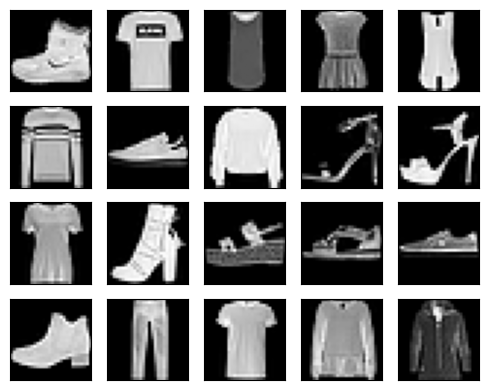

In [ ]:
plt.figure(figsize=(5,4))
i = 0
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.savefig('mnist.png',dpi=300)

In [ ]:
x_train.min(),x_train.max()

(0, 255)

In [ ]:
temp_x_test = x_test
x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
input_shape = (img_rows,img_cols,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)
print(x_train.min(),x_train.max())

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
0.0 1.0


In [ ]:
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

# DEFINE MODEL

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# COMPILE

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

# FIT(TRAIN)

In [ ]:
start = time.time()
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
done = time.time()
print(done-start)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 152s 320ms/step - accuracy: 0.7345 - loss: 0.7599 - val_accuracy: 0.8733 - val_loss: 0.3478
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 199s 314ms/step - accuracy: 0.8696 - loss: 0.3673 - val_accuracy: 0.8979 - val_loss: 0.2873
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 310ms/step - accuracy: 0.8910 - loss: 0.3044 - val_accuracy: 0.8947 - val_loss: 0.2768
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 306ms/step - accuracy: 0.9019 - loss: 0.2722 - val_accuracy: 0.9093 - val_loss: 0.2424
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 307ms/step - accuracy: 0.9124 - loss: 0.2443 - val_accuracy: 0.9104 - val_loss: 0.2439
956.4791090488434


# SAVE MODEL

In [ ]:
filepath_history_model='history_model'
with open(filepath_history_model,'wb') as file:p.dump(history.history,file)

In [ ]:
filepath='model.h5'
model.save(filepath)

In [ ]:
filepath_model='model.json'
filepath_weights='weights_model.weights.h5'
model_json = model.to_json()
with open(filepath_model,'w') as file:file.write(model_json)
model.save_weights(filepath_weights)

# LOAD MODEL

In [ ]:
with open(filepath_history_model,'rb') as file:history=p.load(file)

In [ ]:
h1 = go.Scatter(y=history['loss'],mode='lines',line=dict(width=2,color='blue'),name="loss")
h2 = go.Scatter(y=history['val_loss'],mode='lines',line=dict(width=2,color='red'),name="val_loss")
data=[h1,h2]
layout1 = go.Layout(title='Loss',xaxis=dict(title='epoch'),yaxis=dict(title=''))
fig1 = go.Figure(data,layout=layout1)
plotly.offline.iplot(fig1,filename='testMNIST')

In [ ]:
predict_model=load_model(filepath)
predict_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,884 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [36]:
with open(filepath_model,'r') as file:
  load_model_json = file.read()
  predict_model = model_from_json(load_model_json)
  predict_model.load_weights(filepath_weights)
predict_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
predict_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning:

Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

# PREDICTION

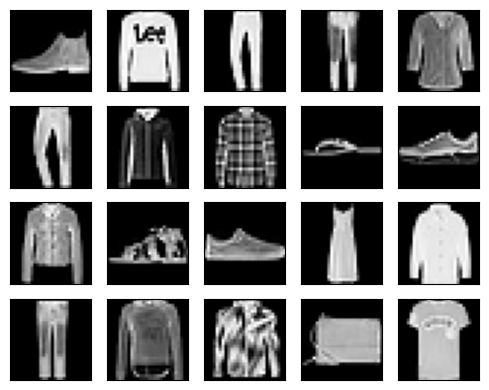

In [ ]:
plt.figure(figsize=(5,4))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(temp_x_test[i],cmap='gray')
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()
plt.savefig('mnist.png',dpi=300)

In [ ]:
result=predict_model.predict(x_test[:1])
result=np.argmax(result,axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


# EVALUATION

In [ ]:
score=predict_model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.24392007291316986
Test accuracy: 0.9103999733924866


In [ ]:
predicted_classes=predict_model.predict(x_test)
predicted_classes=np.argmax(np.round(predicted_classes),axis=-1)
y_true=np.argmax(y_test,axis=-1)
correct=np.nonzero(predicted_classes==y_true)[0]
incorrect=np.nonzero(predicted_classes!=y_true)[0]
print('Correct:',correct.shape[0])
print('Incorrect:',incorrect.shape[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
Correct: 9001
Incorrect: 999


In [ ]:
confusion_matrix(y_true,predicted_classes)
labels = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}
target_names = ["Class {}({})".format(i,labels[i]) for i in range(num_classes)]
print(classification_report(y_true,predicted_classes,target_names=target_names,digits=4))

                      precision    recall  f1-score   support

Class 0(T-shirt/top)     0.6728    0.9460    0.7864      1000
    Class 1(Trouser)     0.9949    0.9730    0.9838      1000
   Class 2(Pullover)     0.8640    0.8580    0.8610      1000
      Class 3(Dress)     0.9325    0.8840    0.9076      1000
       Class 4(Coat)     0.8968    0.7910    0.8406      1000
     Class 5(Sandal)     0.9919    0.9790    0.9854      1000
      Class 6(Shirt)     0.8197    0.6500    0.7250      1000
    Class 7(Sneaker)     0.9522    0.9760    0.9640      1000
        Class 8(Bag)     0.9830    0.9850    0.9840      1000
 Class 9(Ankle boot)     0.9726    0.9590    0.9658      1000

            accuracy                         0.9001     10000
           macro avg     0.9080    0.9001    0.9004     10000
        weighted avg     0.9080    0.9001    0.9004     10000

